In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_461ddf0455d342568f91ad043000ecc1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q2HjO5K9Os_T8q5IQdXG0UPW7fu6Bd8Y9StQLeQ3Z9YL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_461ddf0455d342568f91ad043000ecc1.get_object(Bucket='sarveshshashidhar-donotdelete-pr-odgauoerw9zwtd',Key='Dataset.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

df = df_data_1.drop(['Country'], axis=1)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## To check for NULL values

In [3]:
#To check the number of null values in columns
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## To impute Missing Values

In [4]:
#Imputing the value of Null values
df.fillna(value = df.mean(), inplace = True)
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Extracting x and y columns

In [5]:
#Extracting the X and Y columns
x = df.drop('Life expectancy ', axis = 1)
y = df['Life expectancy ']

In [6]:
x.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

## Encoding the Categorical Data

In [8]:
#Status column is a string data type that needs to be encoded for analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Status'] = le.fit_transform(x['Status'])
x.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Scaling of the Data

In [9]:
#Since the values in the columns are in different ranges, we need to scale them to the same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
np.printoptions(supress = True)
print(x)

[[ 1.6217623   0.45939851  0.79158632 ...  2.77327898 -0.72540055
  -0.57993072]
 [ 1.40498625  0.45939851  0.85607167 ...  2.81790246 -0.74005007
  -0.61056961]
 [ 1.1882102   0.45939851  0.83188966 ...  2.86252595 -0.7693491
  -0.6412085 ]
 ...
 [-1.19632639  0.45939851 -0.73994077 ... -0.79659991 -0.97932554
  -0.61056961]
 [-1.41310244  0.45939851  4.20124926 ... -0.70735294 -0.97932554
  -0.6718474 ]
 [-1.62987849  0.45939851  4.03197521 ...  1.41226265 -0.94514333
  -0.6718474 ]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Splitting the dataset into Training and Testing parts

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-1.19632639e+00  4.59398510e-01  4.93341567e-01 ...  6.09039901e-01
  -6.17970742e-01 -7.33125178e-01]
 [ 7.54658090e-01  4.59398510e-01  8.88314343e-01 ...  2.97408466e+00
  -8.47479873e-01 -7.63764069e-01]
 [-1.12446121e-01 -2.17675935e+00 -1.13491355e+00 ... -4.17300280e-01
   9.00696061e-01  1.35031942e+00]
 ...
 [ 1.18821020e+00  4.59398510e-01 -1.10267087e+00 ...  6.75975130e-01
  -6.17970742e-01 -1.16206965e+00]
 [ 3.21105984e-01  4.59398510e-01  1.64076457e-03 ...  1.50150962e+00
  -1.39419788e-01  3.28470995e-02]
 [ 1.18821020e+00  4.59398510e-01  2.67642838e-01 ... -5.51170738e-01
   5.68640297e-01  9.82652724e-01]]
[[ 1.40498625  0.45939851 -0.344968   ... -0.66272945  1.13508837
   1.38095831]
 [ 1.6217623   0.45939851  0.27570351 ...  1.81387403 -0.36892892
  -0.88631963]
 [-1.19632639  0.45939851  2.08935401 ...  0.89909256 -0.68145199
  -0.76376407]
 ...
 [-0.54599823 -2.17675935 -0.77218345 ... -0.64041771  0.94464462
   0.18604156]
 [-0.76277428  0.45939851  2.129657

## Plotting the data points

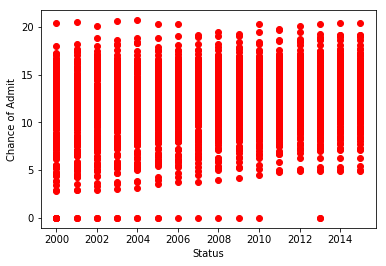

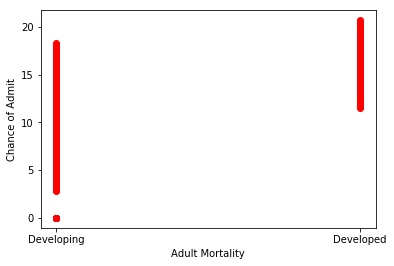

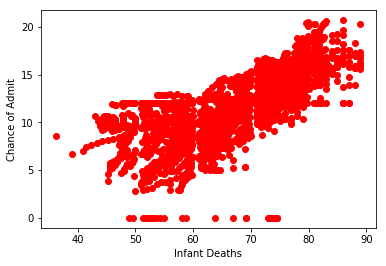

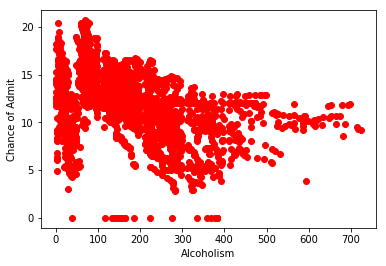

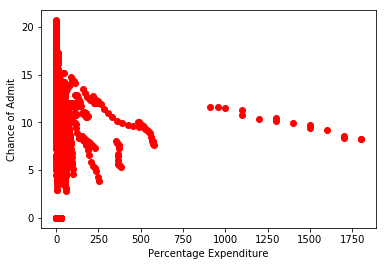

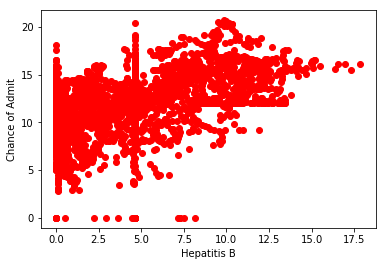

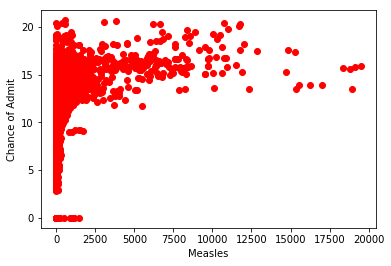

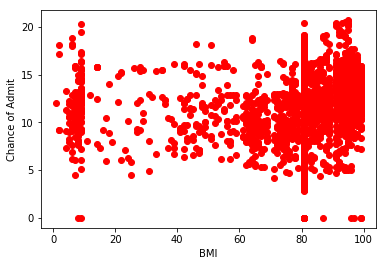

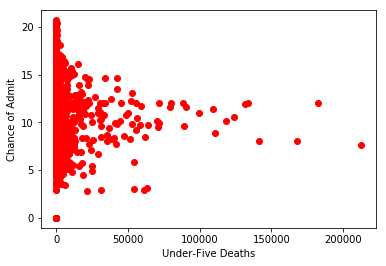

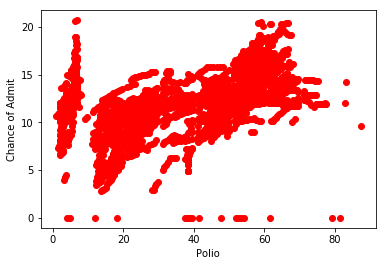

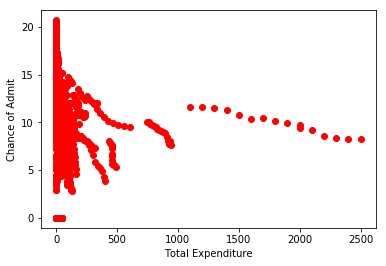

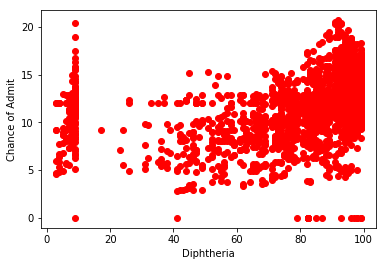

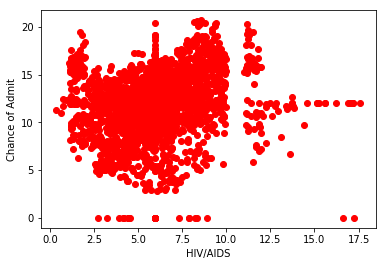

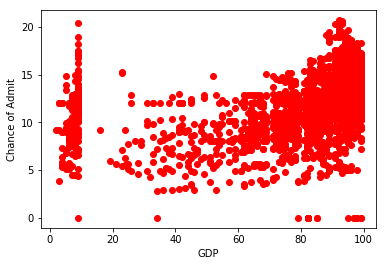

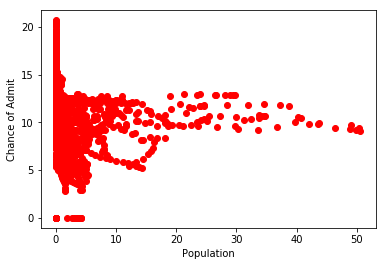

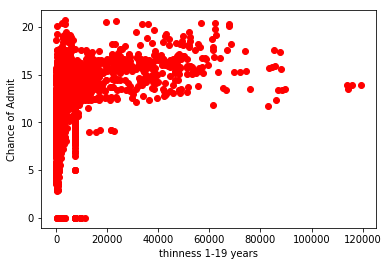

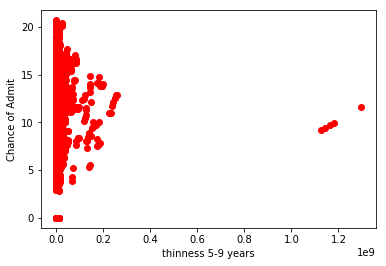

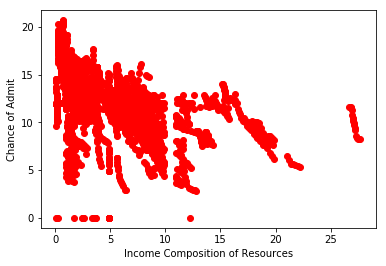

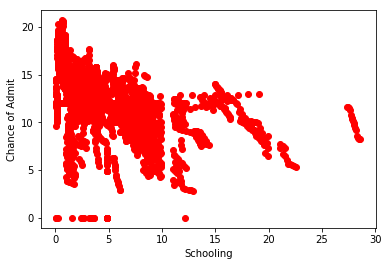

In [11]:
xaxis = ['Status', 'Adult Mortality', 'Infant Deaths', 'Alcoholism', 'Percentage Expenditure', 'Hepatitis B', 'Measles', 
         'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
         'thinness 1-19 years', 'thinness 5-9 years', 'Income Composition of Resources', 'Schooling']
for i in range(19):
    plot1 = plt.figure(i+1)
    x = df.iloc[:, i].values
    y = df.iloc[:, -1].values
    plt.scatter(x, y, color='red')
    plt.xlabel(xaxis[i])
    plt.ylabel('Chance of Admit')

## Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  3.0106267812989573
Mean Squared Error =  16.17172924882961
Root Mean Squared Error =  4.021408863673229
R2 Score =  0.8274459748662755


## Plotting the Datapoints

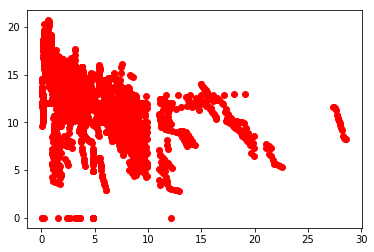

In [13]:
plt.scatter(x, y, color='red')

### We can see that the data points are not linearly varying and therefore using Linear Regression would not be suitable. Therefore, we use other Regression Models

## Polynomial Regression Model

In [14]:
df = df_data_1.drop(['Country'], axis=1)
df.fillna(value = df.mean(), inplace = True)

x = df.drop('Life expectancy ', axis = 1)
y = df['Life expectancy ']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Status'] = le.fit_transform(x['Status'])

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)

from sklearn.model_selection import train_test_split
x_t, x_T, y_t, y_T = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_t,y_t)
y_p = lr.predict(x_T)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_T, y_p)
mse = mean_squared_error(y_T, y_p)
rmse = np.sqrt(mse)
r2 = r2_score(y_T, y_p)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  2.2868756870031146
Mean Squared Error =  13.648314062627865
Root Mean Squared Error =  3.6943624703902382
R2 Score =  0.8543710761193891


## Random Forest Regression Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(x_train, y_train)
y_pr = rfr.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pr)
mse = mean_squared_error(y_test, y_pr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pr)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  1.3088946042898038
Mean Squared Error =  4.236380910287925
Root Mean Squared Error =  2.0582470479240156
R2 Score =  0.9547973771498334


## Feature Importance Graph

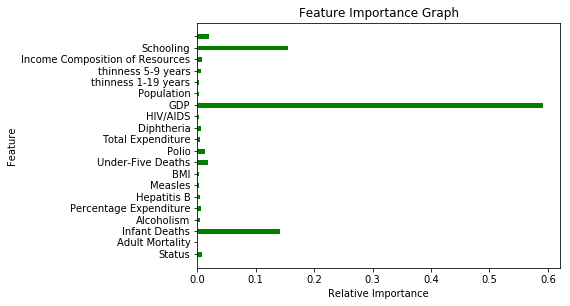

<Figure size 360x360 with 0 Axes>

In [16]:
col = ['Status', 'Adult Mortality', 'Infant Deaths', 'Alcoholism', 'Percentage Expenditure', 'Hepatitis B', 'Measles', 
         'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
         'thinness 1-19 years', 'thinness 5-9 years', 'Income Composition of Resources', 'Schooling']
Y = rfr.feature_importances_
fig, ax = plt.subplots()
width = 0.4
ind = np.arange(len(Y))
ax.barh(ind, Y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature Importance Graph')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### In the figure, we can see that there are just three significant columns in the feature set

## PCA

In [17]:
df = df_data_1.drop(['Country'], axis=1)
df.fillna(value = df.mean(), inplace = True)

x = df.drop('Life expectancy ', axis = 1)
y = df['Life expectancy ']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Status'] = le.fit_transform(x['Status'])

from sklearn.decomposition import PCA
pca = PCA(n_components=11)
x = pca.fit_transform(x)
var = pca.explained_variance_ratio_
print(var)

[9.99999896e-01 6.12071891e-08 4.22968296e-08 2.83035236e-10
 7.65437144e-12 4.83206870e-12 3.35612918e-13 1.15923665e-13
 9.85906229e-14 5.99808491e-14 1.86531950e-14]


### From the above output, we see that each individual input feature is contributing very less to the data prediction model. Therefore, we can't ignore or drop a column and thus, PCA is not helpful in this case

### Since we have the Random Forest Regression Model as the best model yet, let us try to enhance this model

## Best Value for n_estimators

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
L = []
for i in range(1,101):
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(x_train, y_train)
    y_pr = rfr.predict(x_test)
    r2 = r2_score(y_test, y_pr)
    L.append(r2)
m = max(L)
for i in range(100):
    if(L[i]==m):
        print(i+1, "       ", m)

88         0.9595432649430953


## Enhanced Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=88, random_state=0)
rfr.fit(x_train, y_train)
y_pr = rfr.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pr)
mse = mean_squared_error(y_test, y_pr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pr)

print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)
print("R2 Score = ",r2)

Mean Absolute Error =  1.1992725029654192
Mean Squared Error =  3.7915972410661873
Root Mean Squared Error =  1.947202413994546
R2 Score =  0.9595432649430953
